# <font color = 'brown'> <b>Machine Learning Project on Obesity stages of a person</b> </font>

## <font color = 'green'> Group member </font>
- <font color = 'brown'> <b>Divya Goel</b> </font><font color = 'brown'> <b>(21/94045)<b></font>
- <font color = 'brown'> <b>Sudhir</b> </font><font color = 'brown'><b>(21/94014)</b></font>

### <font color = 'brown'>Source of Data set</font> - https://www.kaggle.com/datasets/fatemehmehrparvar/obesity-levels

### <font color = 'brown'> Description of the data<font>
- <b>This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. The data contains 17 attributes and 2111 records, the records are labeled with the class variable NObesity (Obesity Level), that allows classification of the data using the values of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III. 77% of the data was generated synthetically using the Weka tool and the SMOTE filter, 23% of the data was collected directly from users through a web platform.</b>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.feature_selection import RFE
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [7]:
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
df.shape

(2111, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

# Exploratory Data analysis 

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'FCVC'}>,
        <Axes: title={'center': 'NCP'}>,
        <Axes: title={'center': 'CH2O'}>],
       [<Axes: title={'center': 'FAF'}>, <Axes: title={'center': 'TUE'}>,
        <Axes: >]], dtype=object)

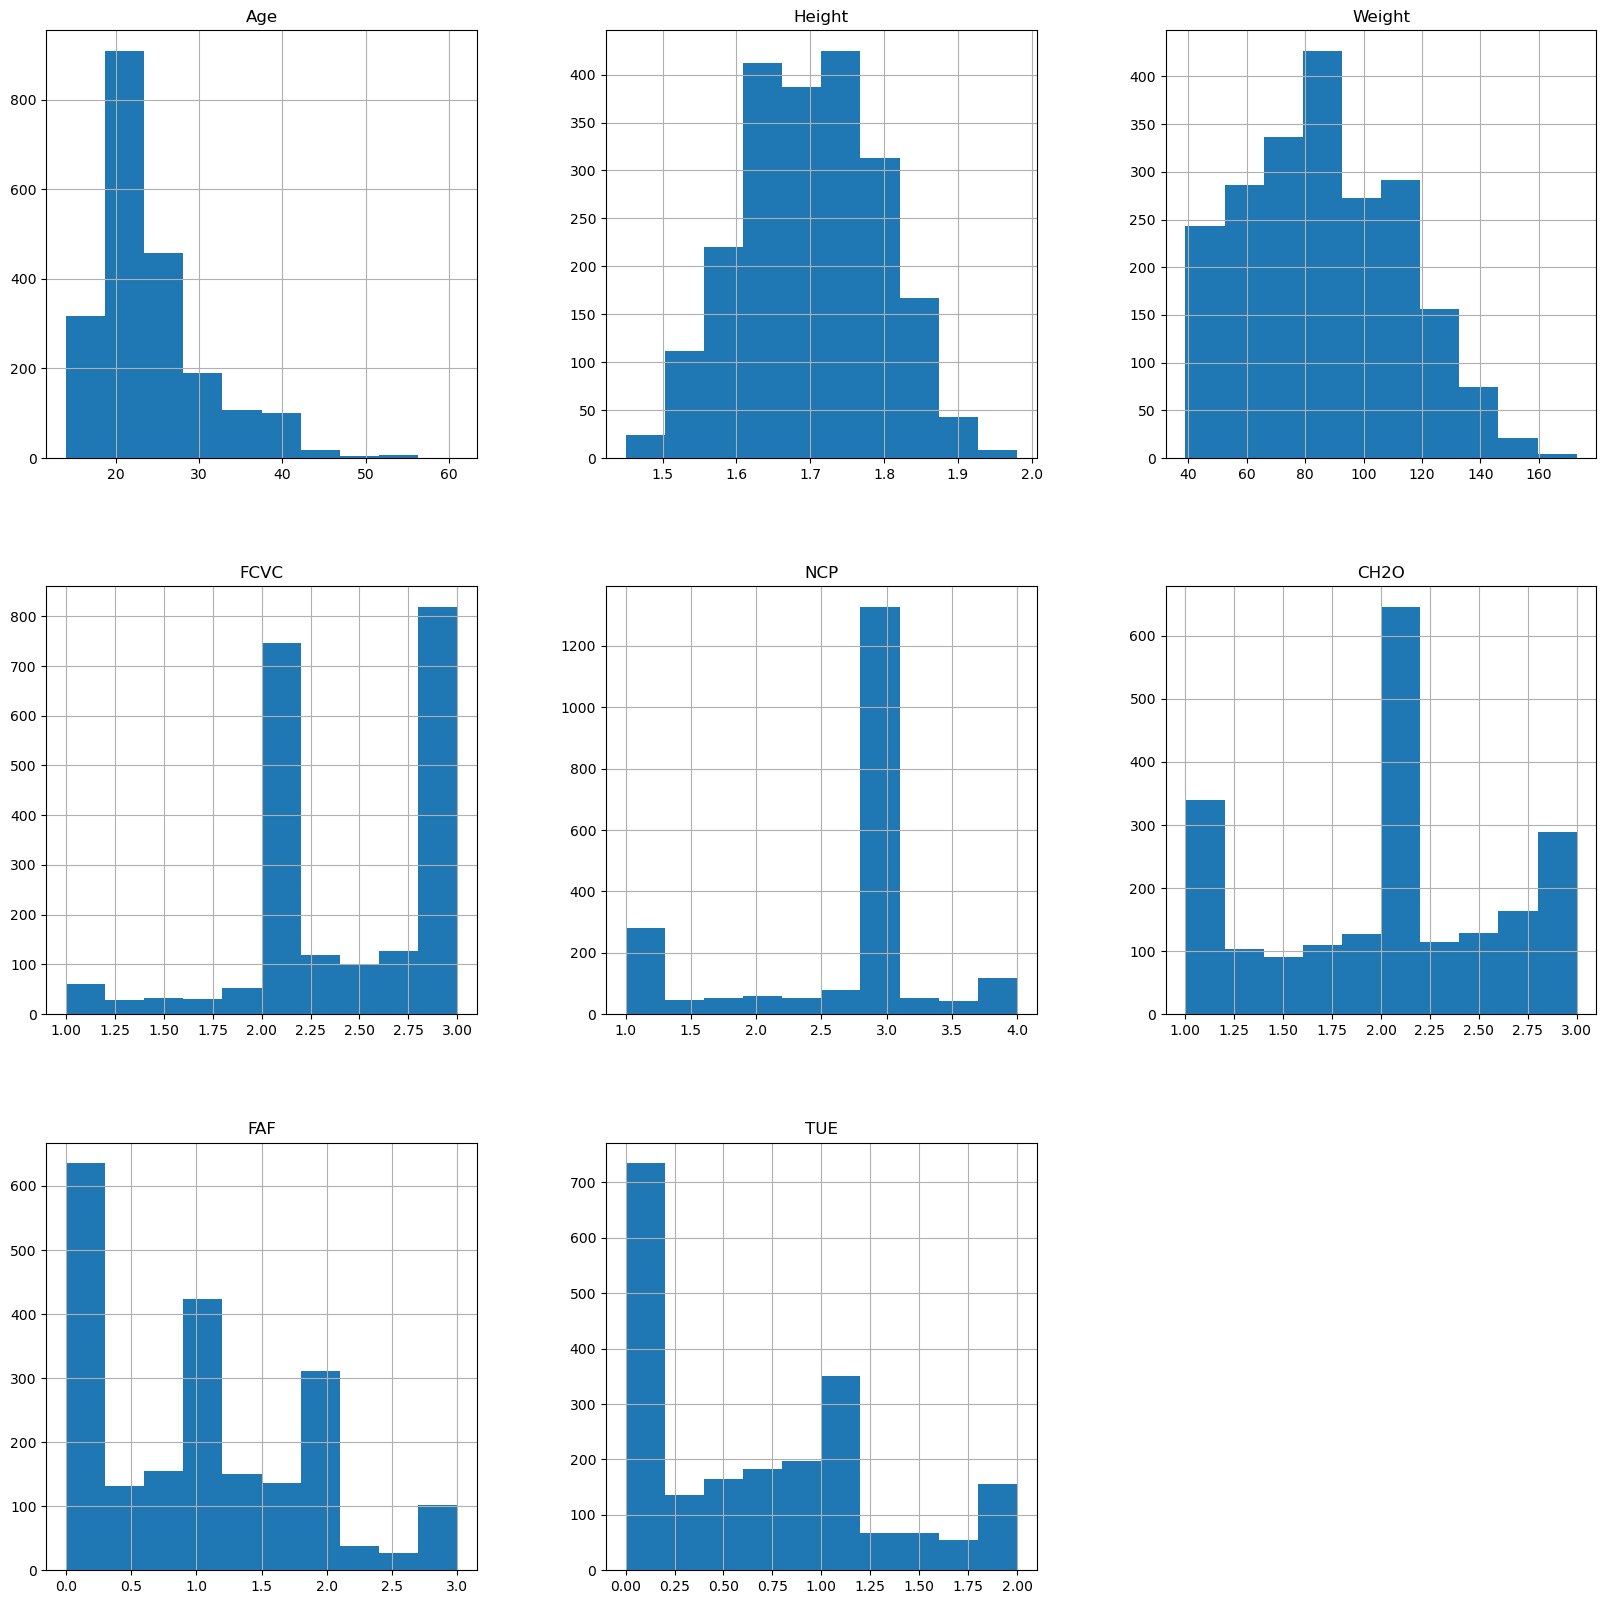

In [11]:
df.hist(figsize=(20,20))

In [12]:
# sns.pairplot(df)

<Axes: >

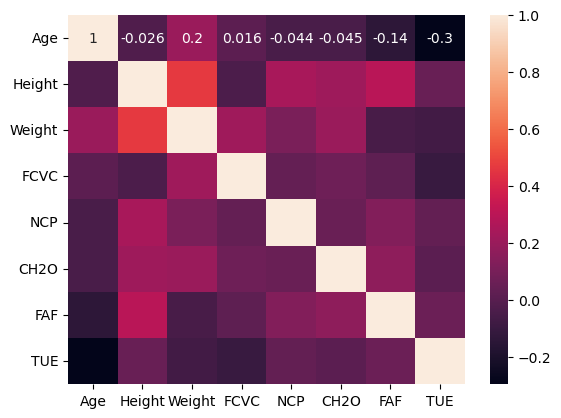

In [13]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='Age', ylabel='Height'>

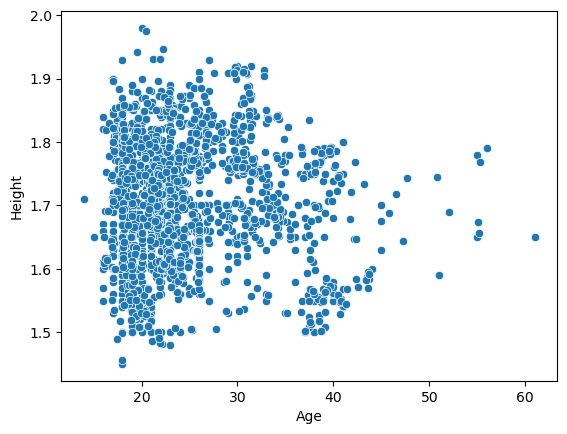

In [14]:
sns.scatterplot(data=df,x='Age',y='Height')

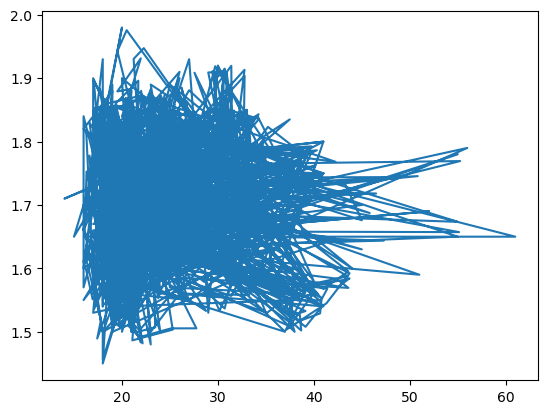

In [15]:
plt.plot(df['Age'],df['Height'])

<Axes: xlabel='Age', ylabel='Weight'>

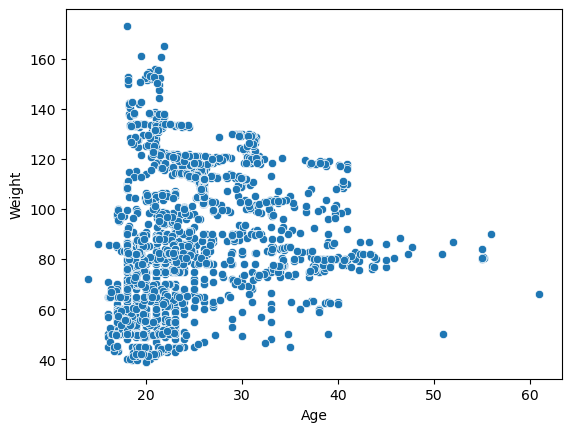

In [16]:
sns.scatterplot(data=df,x='Age',y='Weight')

<Axes: xlabel='Weight', ylabel='Height'>

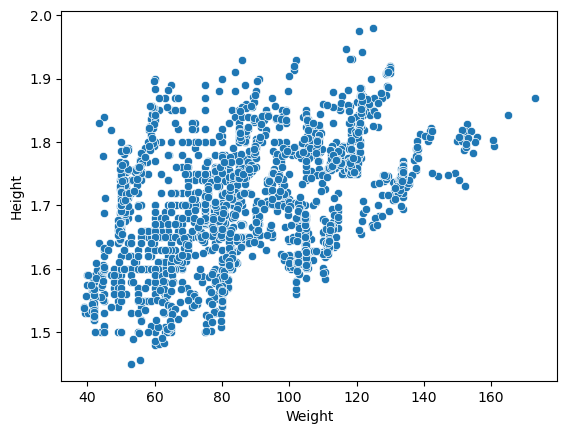

In [17]:
sns.scatterplot(data=df,x='Weight',y='Height')

# Pre - processing 


In [19]:
df.isnull().sum().sum()

0

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


In [22]:
df.describe(include='object')

,Gender,CALC,FAVC,SCC,SMOKE,family_history_with_overweight,CAEC,MTRANS,NObeyesdad
count,2111,2111,2111,2111,2111,2111,2111,2111,2111
unique,2,4,2,2,2,2,4,5,7
top,Male,Sometimes,yes,no,no,yes,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,1401,1866,2015,2067,1726,1765,1580,351


In [23]:
num=['Age','Height','Weight','FCVC','NCP','CH2O','FAF','TUE']

<Axes: >

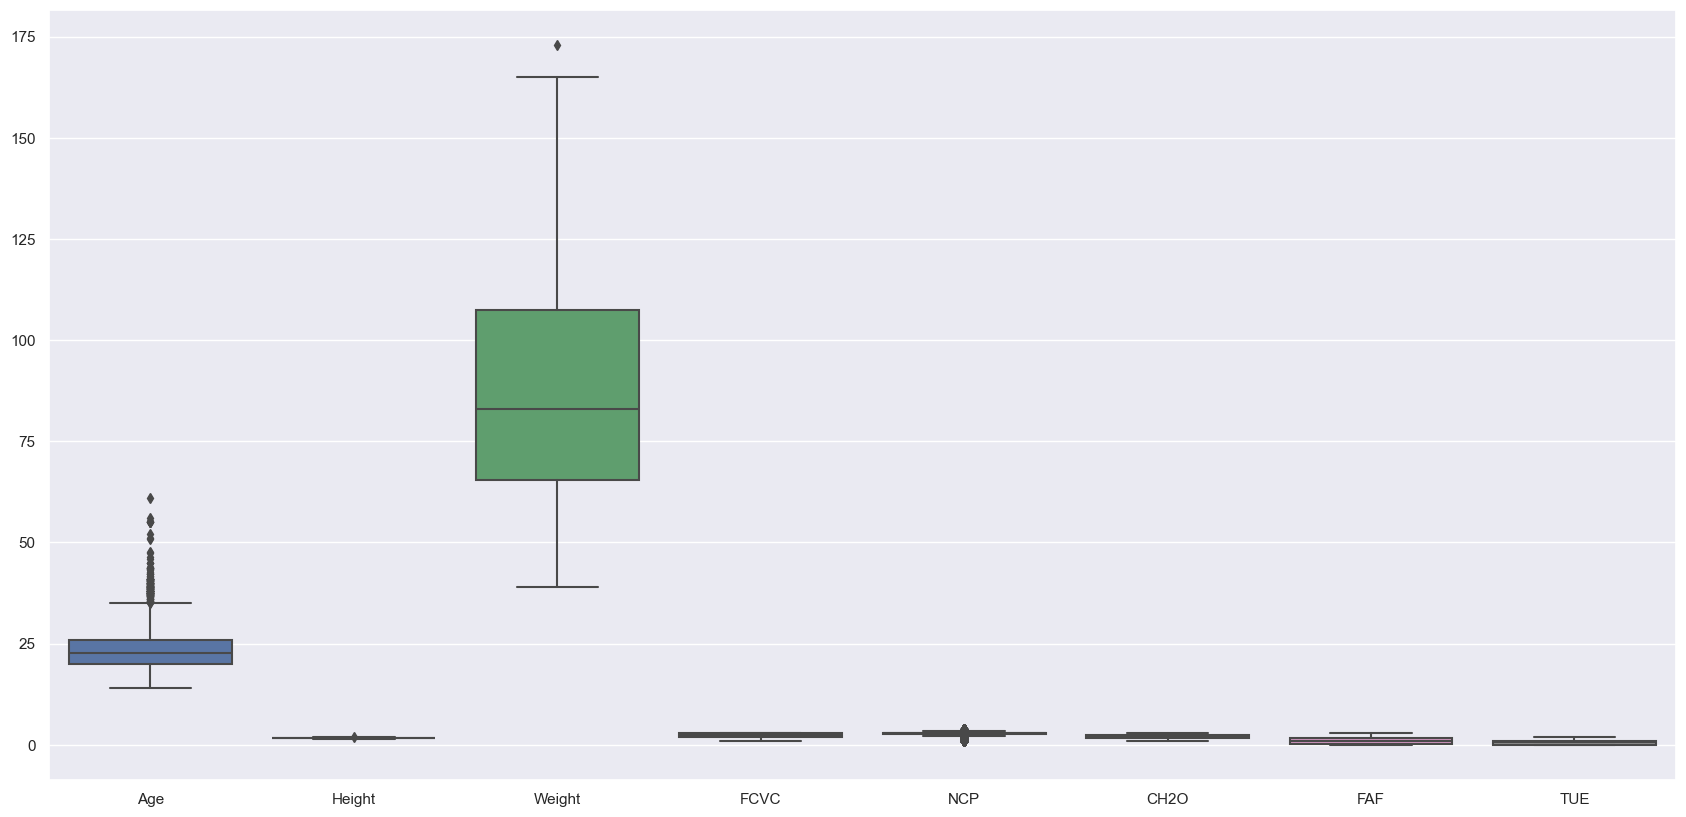

In [24]:
sns.set(rc={'figure.figsize':(21,10)})
sns.boxplot(data=df[num])

### Arranging the dataset

In [26]:
val=['FAVC','SCC','SMOKE','family_history_with_overweight']

In [27]:
df[val]=df[val].apply(lambda x: x.map({'yes': 1,'no':0}))

In [28]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,0,2.0,3.0,0,0,2.000000,1,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,0,2.0,3.0,0,0,2.000000,1,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,0,3.0,3.0,0,0,2.000000,0,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,0,2.0,1.0,0,0,2.000000,0,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,1,3.0,3.0,0,0,1.728139,1,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,1,3.0,3.0,0,0,2.005130,1,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,1,3.0,3.0,0,0,2.054193,1,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,1,3.0,3.0,0,0,2.852339,1,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [29]:
gender=pd.get_dummies(df['Gender'],dtype=int)
df=pd.concat([df,gender],axis=1)

In [30]:
calc=pd.get_dummies(df['CALC'],dtype=int , prefix='CALC')
df=pd.concat([df,calc],axis=1)

CAEC=pd.get_dummies(df['CAEC'],dtype=int,prefix='CAEC')
df=pd.concat([df,CAEC],axis=1)

MTRANS=pd.get_dummies(df['MTRANS'],dtype=int,prefix='MTRANS')
df=pd.concat([df,MTRANS],axis=1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   int64  
 12  FAF                             21

In [32]:
df=df.drop(['Gender','CALC','CAEC','MTRANS'],axis=1)

In [33]:
df.head()

,Age,Height,Weight,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,...,CALC_no,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,0,2.0,3.0,0,0,2.0,1,...,1,0,0,1,0,0,0,0,1,0
1,21.0,1.52,56.0,0,3.0,3.0,1,1,3.0,1,...,0,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,0,2.0,3.0,0,0,2.0,1,...,0,0,0,1,0,0,0,0,1,0
3,27.0,1.80,87.0,0,3.0,3.0,0,0,2.0,0,...,0,0,0,1,0,0,0,0,0,1
4,22.0,1.78,89.8,0,2.0,1.0,0,0,2.0,0,...,0,0,0,1,0,0,0,0,1,0


# Feature Scaling 

In [35]:
df_train,df_test=train_test_split(df,train_size=0.70,random_state=100)
sc=StandardScaler()
df_train[num]=sc.fit_transform(df_train[num])
df_test[num]=sc.transform(df_test[num])
y_train=df_train.pop('NObeyesdad')
X_train=df_train
y_test=df_test.pop('NObeyesdad')
X_test=df_test

# Model using hold out method 

In [37]:
lr=LogisticRegression()
model=lr.fit(X_train,y_train)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Height                          2111 non-null   float64
 2   Weight                          2111 non-null   float64
 3   FAVC                            2111 non-null   int64  
 4   FCVC                            2111 non-null   float64
 5   NCP                             2111 non-null   float64
 6   SCC                             2111 non-null   int64  
 7   SMOKE                           2111 non-null   int64  
 8   CH2O                            2111 non-null   float64
 9   family_history_with_overweight  2111 non-null   int64  
 10  FAF                             2111 non-null   float64
 11  TUE                             2111 non-null   float64
 12  NObeyesdad                      21

90.1150981719702
90.1150981719702


(<Figure size 2100x1000 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

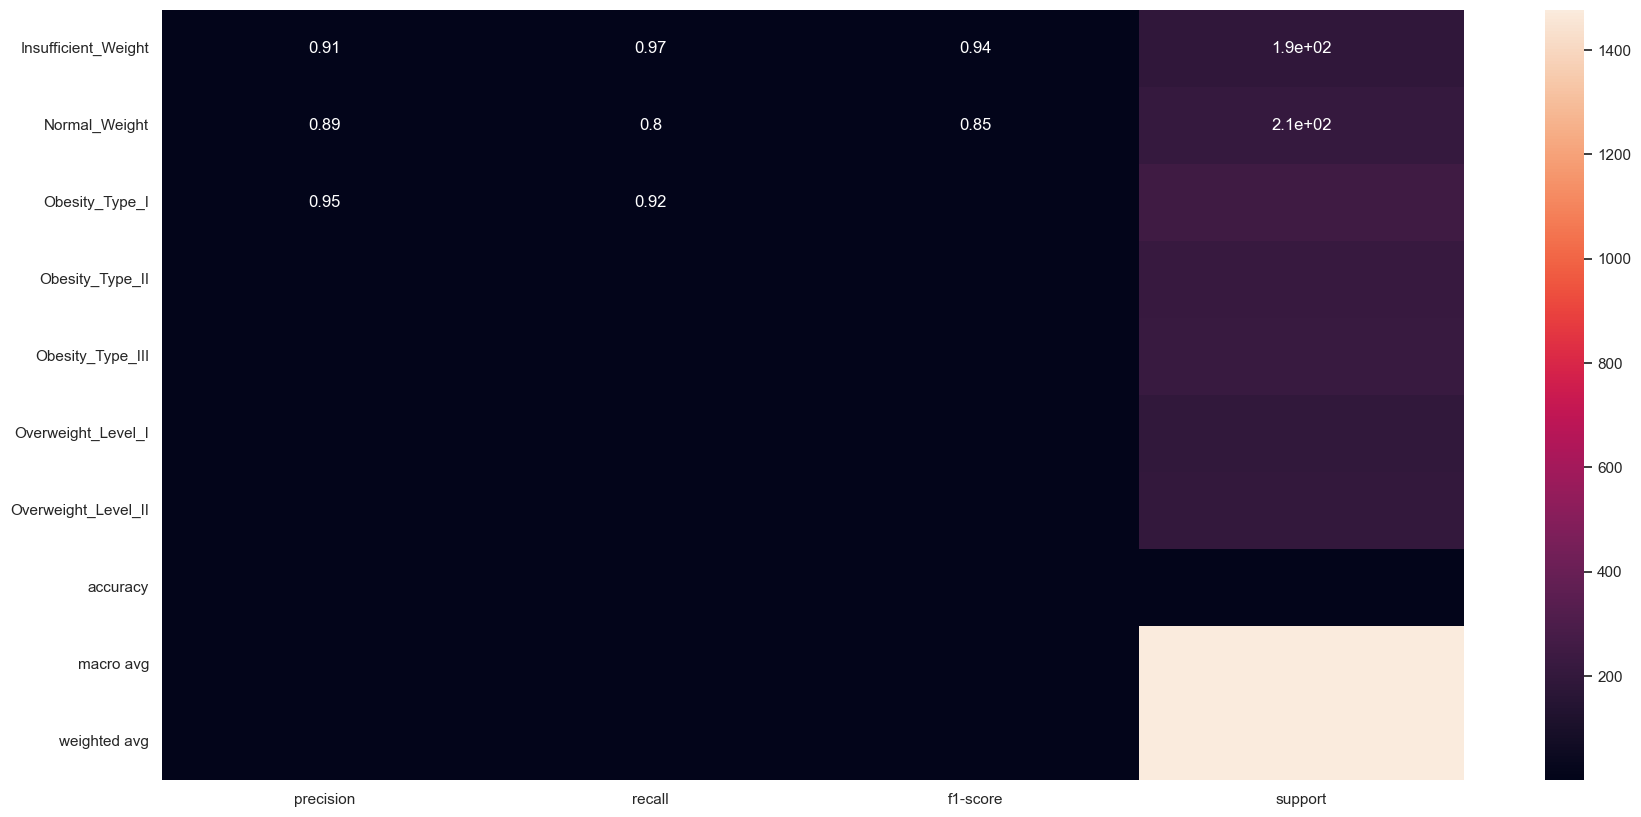

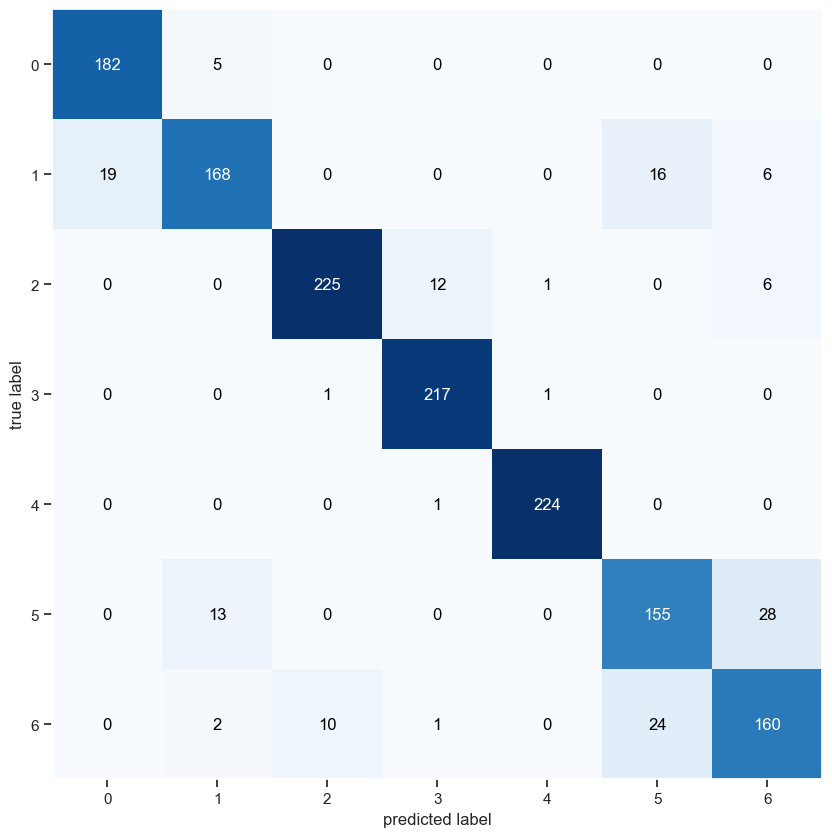

In [46]:
y_pred=model.predict(X_train)
print(100*(y_pred==y_train).sum()/len(y_pred))
testAccuracy=metrics.accuracy_score(y_train , y_pred)
print(testAccuracy*100)
report=metrics.classification_report(y_train,y_pred,output_dict=True)
reportDf=pd.DataFrame(report)
sns.heatmap(reportDf.T,annot=True)
cm=metrics.confusion_matrix(y_train,y_pred)
plot_confusion_matrix(cm)

In [47]:
X_train.shape,X_test.shape


((1477, 27), (634, 27))

87.38170347003154
87.38170347003155


(<Figure size 2100x1000 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

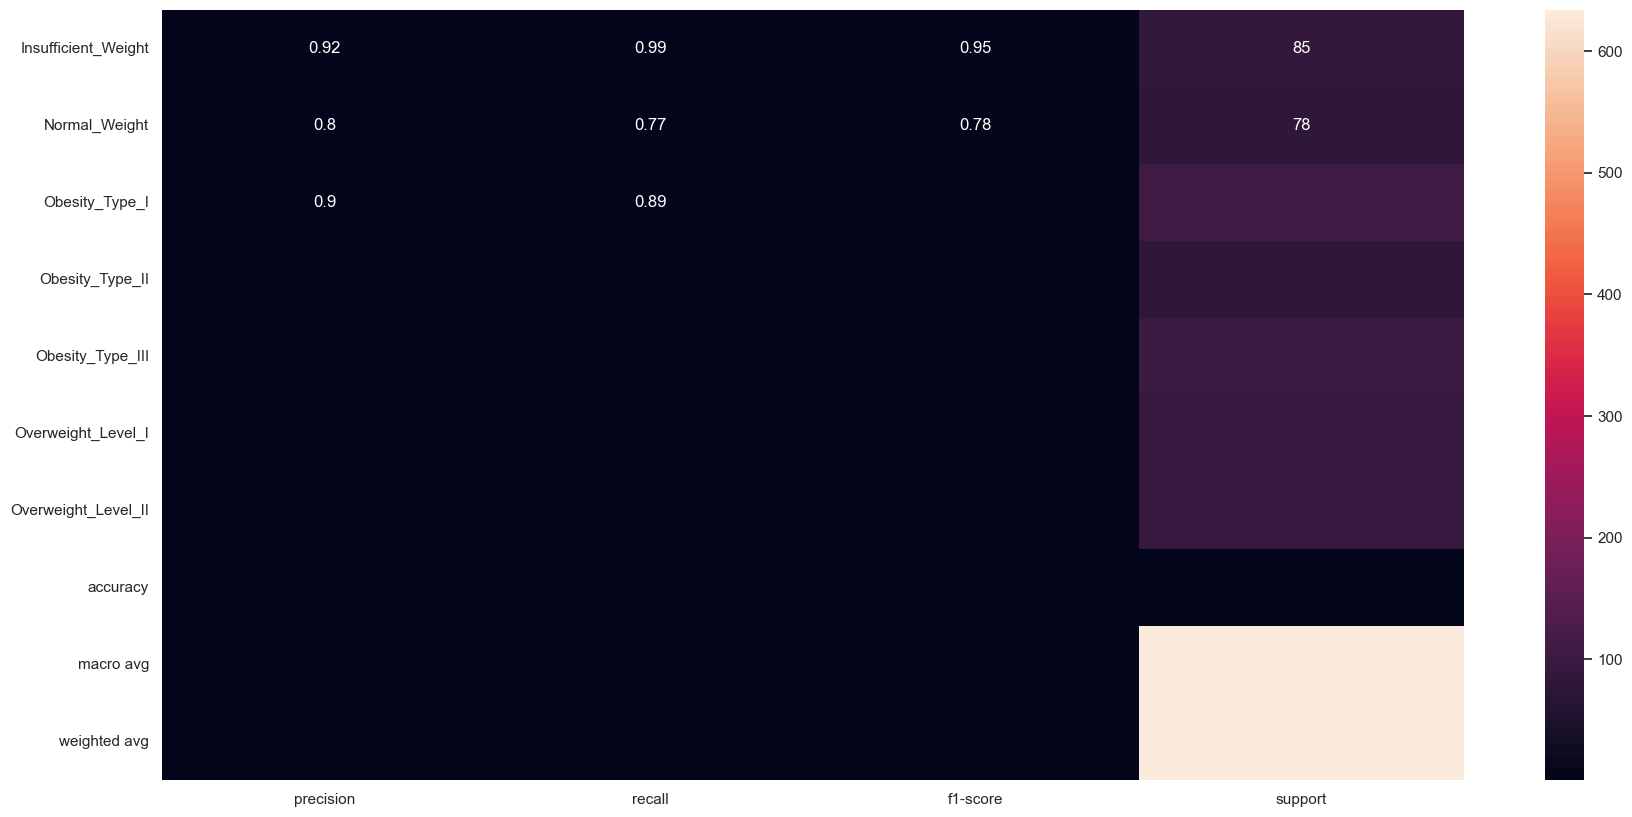

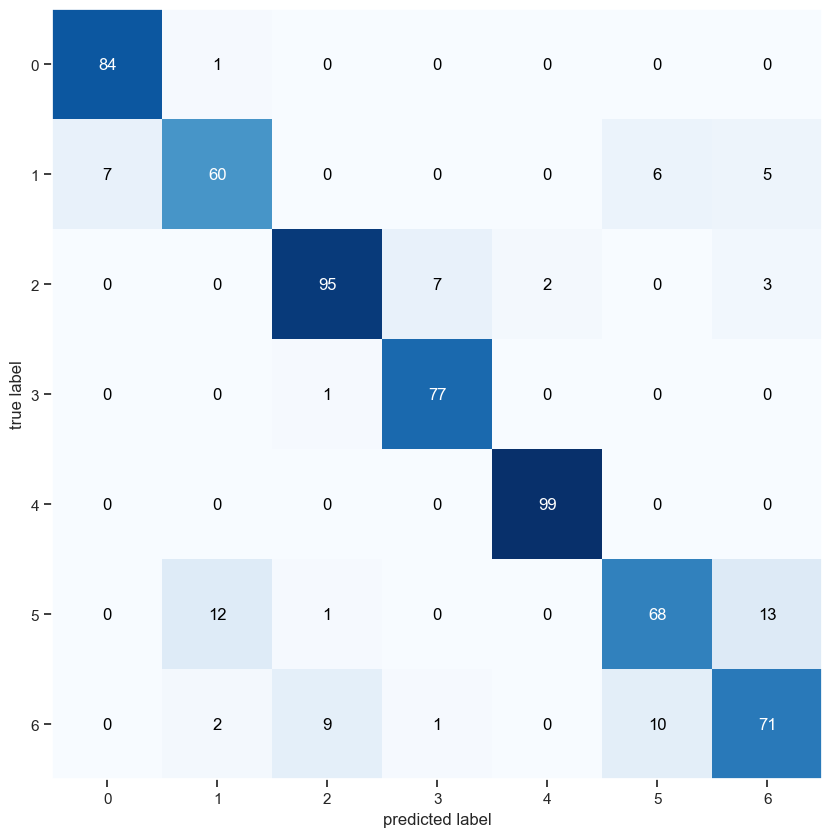

In [48]:
y_test_pred=model.predict(X_test)
print(100*(y_test_pred==y_test).sum()/len(y_test_pred))
testAccuracy=metrics.accuracy_score(y_test , y_test_pred)
print(testAccuracy*100)
report=metrics.classification_report(y_test,y_test_pred,output_dict=True)
reportDf=pd.DataFrame(report)
sns.heatmap(reportDf.T,annot=True)
cm=metrics.confusion_matrix(y_test,y_test_pred)
plot_confusion_matrix(cm)


## Feature selections in hold out method 

In [50]:
rfe=RFE(lr)
model=rfe.fit(X_train,y_train)
for x,i,j in zip(X_train.columns,rfe.support_,rfe.ranking_):
    print('[ {0} , {1} , {2}]'.format(x,i,j))


[ Age , True , 1]
[ Height , True , 1]
[ Weight , True , 1]
[ FAVC , True , 1]
[ FCVC , True , 1]
[ NCP , False , 7]
[ SCC , False , 4]
[ SMOKE , False , 6]
[ CH2O , False , 11]
[ family_history_with_overweight , True , 1]
[ FAF , False , 8]
[ TUE , False , 14]
[ Female , True , 1]
[ Male , True , 1]
[ CALC_Always , False , 15]
[ CALC_Frequently , False , 12]
[ CALC_Sometimes , False , 3]
[ CALC_no , True , 1]
[ CAEC_Always , True , 1]
[ CAEC_Frequently , True , 1]
[ CAEC_Sometimes , False , 5]
[ CAEC_no , False , 2]
[ MTRANS_Automobile , True , 1]
[ MTRANS_Bike , False , 10]
[ MTRANS_Motorbike , False , 13]
[ MTRANS_Public_Transportation , True , 1]
[ MTRANS_Walking , False , 9]


In [51]:
cols=X_train.columns[rfe.support_]
X=X_train[cols]
X_te=X_test[cols]
model=rfe.fit(X,y_train)


89.77657413676371
89.77657413676371


(<Figure size 2100x1000 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

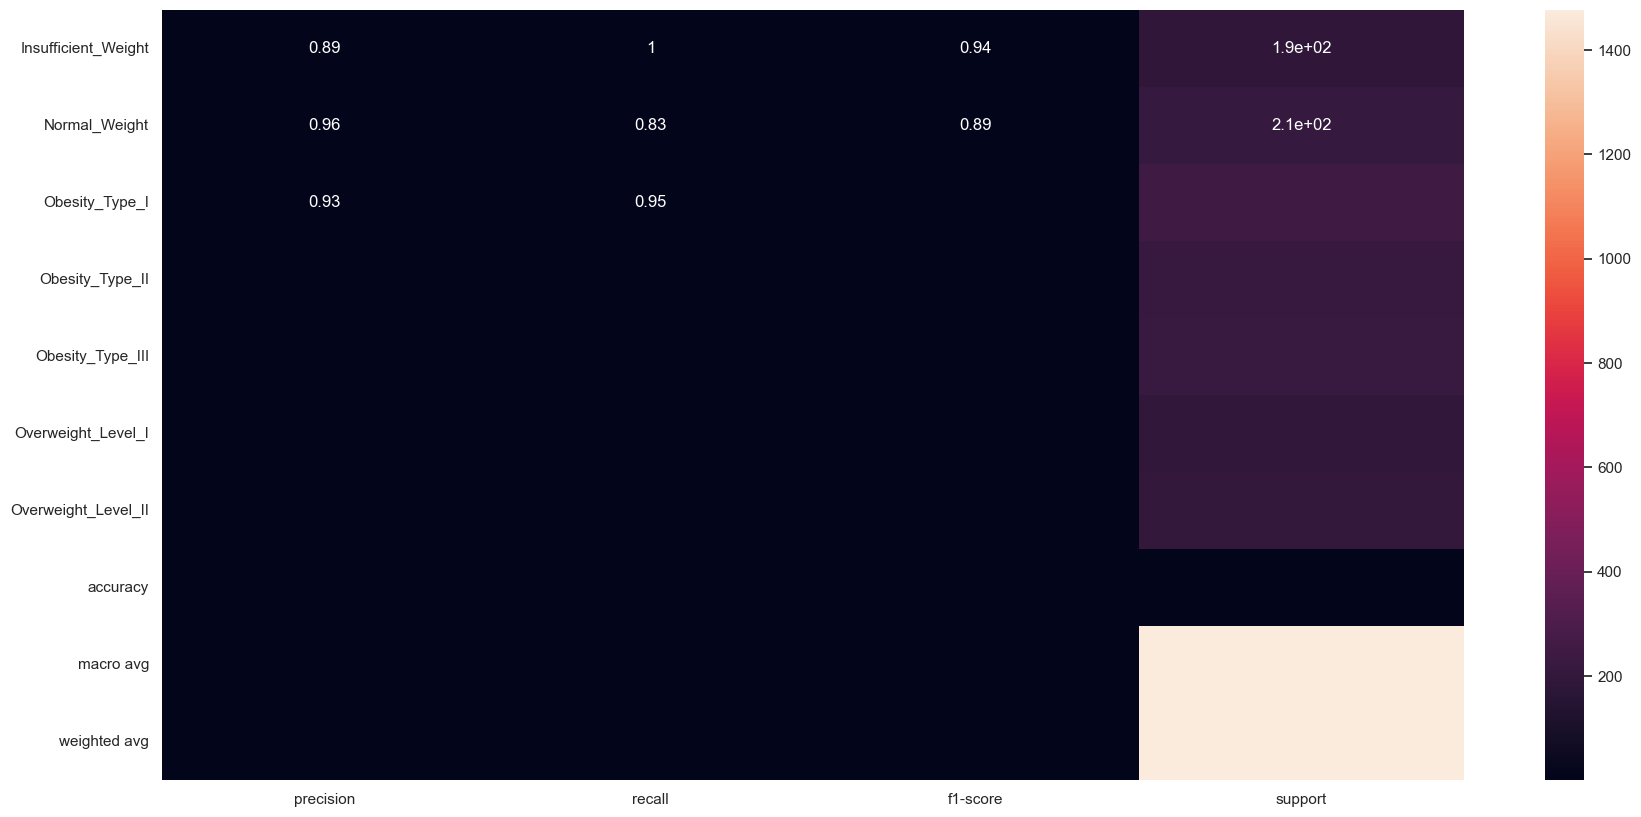

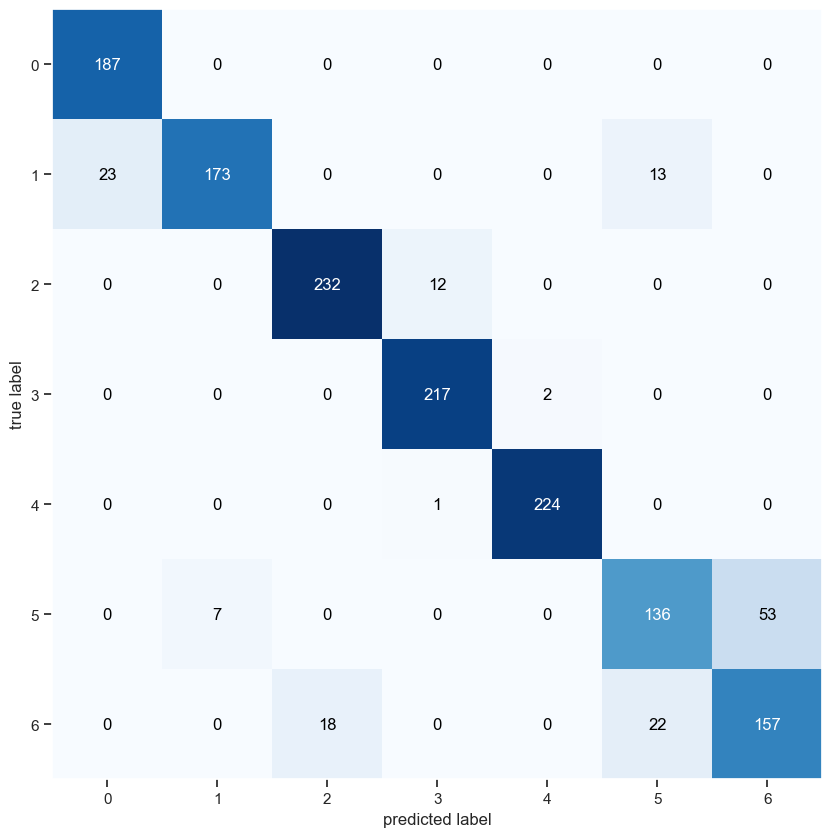

In [52]:
y_pred=model.predict(X)
print(100*(y_pred==y_train).sum()/len(y_pred))
testAccuracy=metrics.accuracy_score(y_train , y_pred)
print(testAccuracy*100)
report=metrics.classification_report(y_train,y_pred,output_dict=True)
reportDf=pd.DataFrame(report)
sns.heatmap(reportDf.T,annot=True)
cm=metrics.confusion_matrix(y_train,y_pred)
plot_confusion_matrix(cm)

88.17034700315457
88.17034700315457


(<Figure size 2100x1000 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

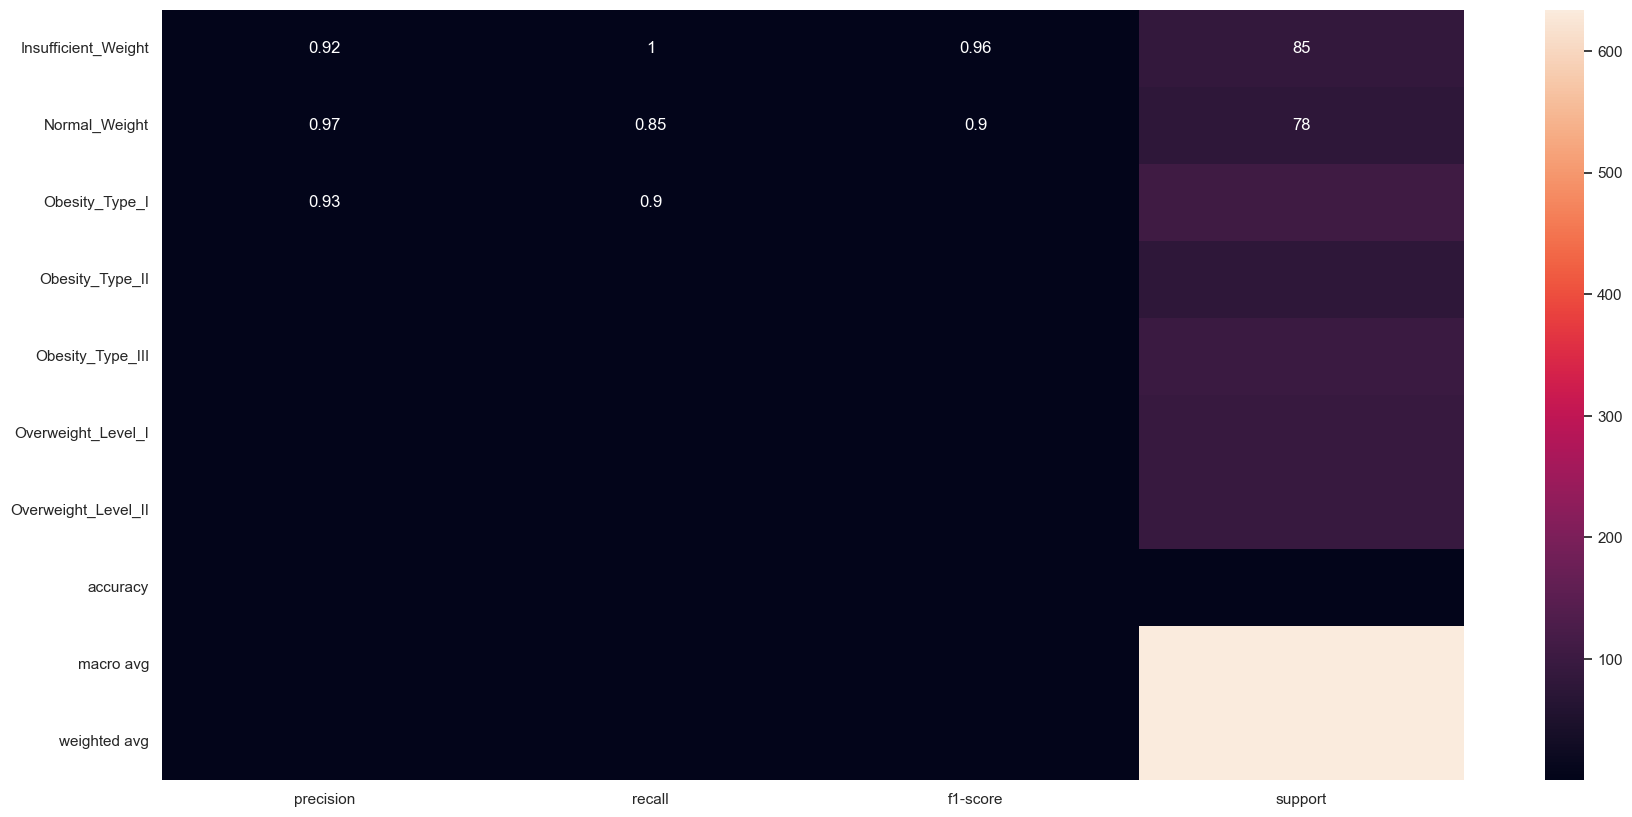

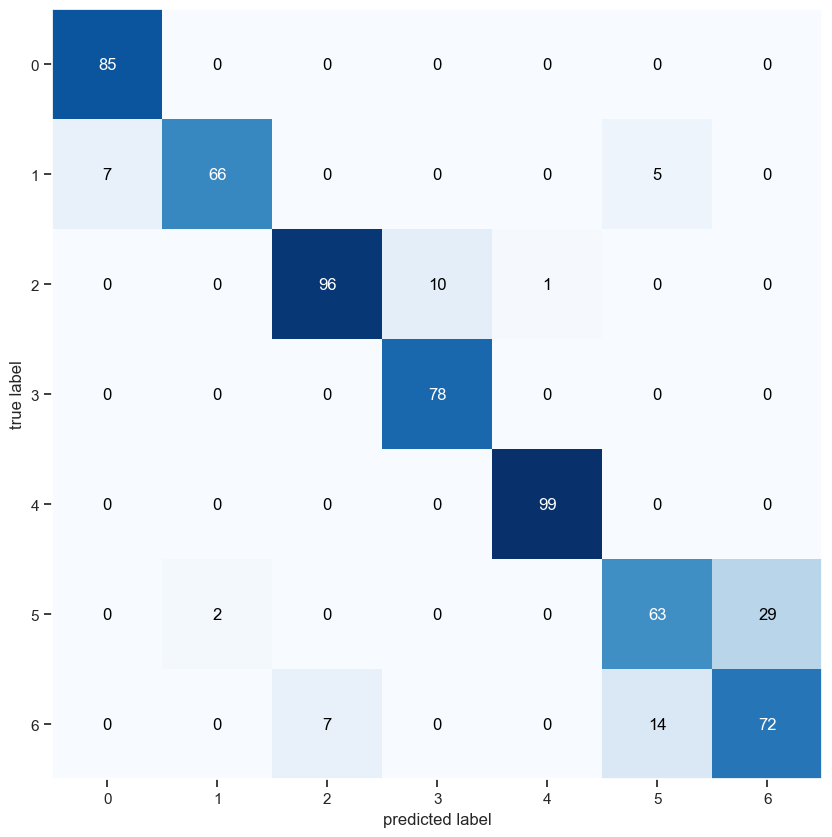

In [53]:
y_test_pred=model.predict(X_te)
print(100*(y_test_pred==y_test).sum()/len(y_test_pred))
testAccuracy=metrics.accuracy_score(y_test , y_test_pred)
print(testAccuracy*100)
report=metrics.classification_report(y_test,y_test_pred,output_dict=True)
reportDf=pd.DataFrame(report)
sns.heatmap(reportDf.T,annot=True)
cm=metrics.confusion_matrix(y_test,y_test_pred)
plot_confusion_matrix(cm)

# K-fold validation 

In [55]:
df[num]=sc.transform(df[num])
X=df[cols]

In [56]:
y=df.pop('NObeyesdad')

In [97]:
acc=[]
skf = StratifiedKFold(n_splits=10,random_state=1, shuffle=True)
for train_index, test_index in skf.split(X,y):
    X_train = X.iloc[train_index]
    y_train = y[train_index]
    X_test = X.iloc[test_index]
    y_test = y[test_index]
    LRModel = LogisticRegression(penalty = 'l2',max_iter=10000)
    LRModel.fit(X_train, y_train)
    y_test_pred = LRModel.predict(X_test)
    testAccuracy = metrics.accuracy_score(y_test, y_test_pred)
    print("Test Accuracy", testAccuracy*100)
    acc.append(testAccuracy*100)
print("AVG: ",sum(acc)/len(acc))

Test Accuracy 89.15094339622641
Test Accuracy 91.9431279620853
Test Accuracy 89.57345971563981
Test Accuracy 89.0995260663507
Test Accuracy 89.0995260663507
Test Accuracy 90.99526066350711
Test Accuracy 89.57345971563981
Test Accuracy 88.62559241706161
Test Accuracy 88.62559241706161
Test Accuracy 87.67772511848341
AVG:  89.43642135384064


# Decision tree classifier 

In [59]:
f=['Age', 'Height', 'Weight', 'FAVC', 'FCVC',
       'family_history_with_overweight', 'Female', 'Male', 'CALC_no',
       'CAEC_Always', 'CAEC_Frequently', 'MTRANS_Automobile',
       'MTRANS_Public_Transportation']

Test Accuracy 94.81132075471697
Test Accuracy 96.6824644549763
Test Accuracy 94.7867298578199
Test Accuracy 93.8388625592417
Test Accuracy 94.7867298578199
Test Accuracy 93.8388625592417
Test Accuracy 97.1563981042654
Test Accuracy 93.8388625592417
Test Accuracy 91.4691943127962
Test Accuracy 91.4691943127962
Average accuracy :  94.2678619332916


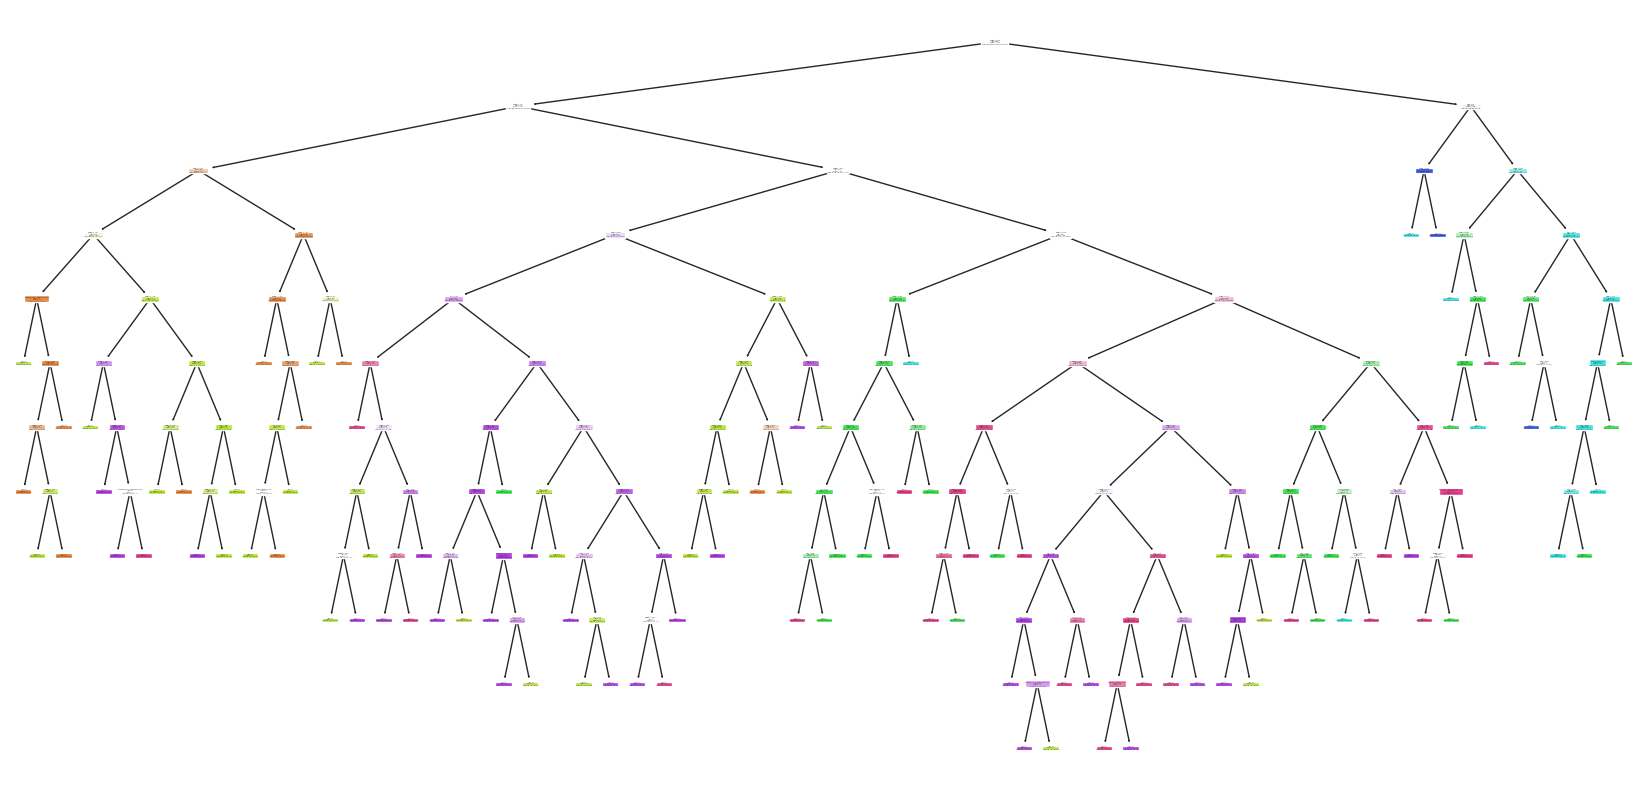

In [60]:
accDTC = []

for train_index, test_index in skf.split(X,y):
    X_train = X.iloc[train_index]
    y_train = y[train_index]
    X_test = X.iloc[test_index]
    y_test = y[test_index]
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    y_test_pred = tree.predict(X_test)
    testAccuracy =metrics.accuracy_score(y_test, y_test_pred)
    print("Test Accuracy", testAccuracy*100)
    accDTC.append(testAccuracy*100)

print("Average accuracy : ",sum(accDTC)/len(accDTC))

plot_tree(tree,feature_names=f,filled = True)
plt.show()

# Naive bayes classification 

In [62]:
accNBC = []

gnb = GaussianNB()
for train_index, test_index in skf.split(X,y):
    X_train = X.iloc[train_index]
    y_train = y[train_index]
    X_test = X.iloc[test_index]
    y_test = y[test_index]
    gnb.fit(X_train, y_train)
    y_test_pred = gnb.predict(X_test)
    testAccuracy =metrics.accuracy_score(y_test, y_test_pred)
    print("Test Accuracy", testAccuracy*100)
    accNBC.append(testAccuracy*100)
print("Average Accuracy : ",sum(accNBC)/len(accNBC))

Test Accuracy 58.01886792452831
Test Accuracy 60.18957345971564
Test Accuracy 58.29383886255924
Test Accuracy 60.66350710900474
Test Accuracy 54.976303317535546
Test Accuracy 58.29383886255924
Test Accuracy 59.241706161137444
Test Accuracy 58.29383886255924
Test Accuracy 55.45023696682464
Test Accuracy 58.767772511848335
Average Accuracy :  58.218948403827234


# K - nearest neighbour classification

In [64]:
from sklearn.neighbors import KNeighborsClassifier
import math
accK=[]
for train_index, test_index in skf.split(X,y):
    X_train = X.iloc[train_index]
    y_train = y[train_index]
    X_test = X.iloc[test_index]
    y_test = y[test_index]
    X_test = X_test.values.reshape(-1, X_train.shape[1])
    model = KNeighborsClassifier(n_neighbors=int(np.sqrt(train_index.shape[0])))
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    testAccuracy =metrics.accuracy_score(y_test, y_test_pred)
    print("Test Accuracy", testAccuracy*100)
    accK.append(testAccuracy*100)

print("Average Accuracy : ",sum(accK)/len(accK))

Test Accuracy 72.16981132075472
Test Accuracy 77.72511848341233
Test Accuracy 72.51184834123224
Test Accuracy 69.66824644549763
Test Accuracy 75.82938388625593
Test Accuracy 73.45971563981043
Test Accuracy 70.61611374407583
Test Accuracy 71.56398104265402
Test Accuracy 72.51184834123224
Test Accuracy 74.40758293838863
Average Accuracy :  73.0463650183314


# Classification Report 

Test Accuracy 89.15094339622641
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.87      0.96      0.91        27
      Normal_Weight       0.87      0.69      0.77        29
     Obesity_Type_I       0.97      0.89      0.93        35
    Obesity_Type_II       0.94      1.00      0.97        30
   Obesity_Type_III       1.00      1.00      1.00        33
 Overweight_Level_I       0.71      0.86      0.78        29
Overweight_Level_II       0.89      0.83      0.86        29

           accuracy                           0.89       212
          macro avg       0.89      0.89      0.89       212
       weighted avg       0.90      0.89      0.89       212

Test Accuracy 91.9431279620853
Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.93      1.00      0.96        27
      Normal_Weight       0.95      0.69      0.80        29
     Obesity_Type_I       0.94   

(<Figure size 2100x1000 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

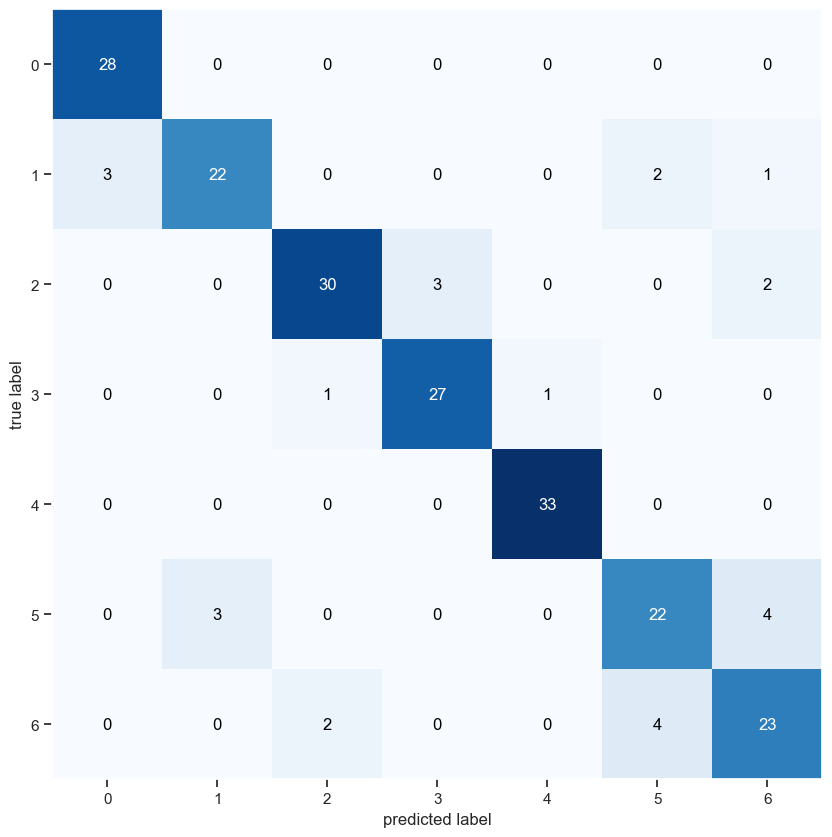

In [66]:
# Initialize lists to store metrics for each iteration
f1_scores = []
precisions = []
recalls = []

for train_index, test_index in skf.split(X,y):
    X_train = X.iloc[train_index]
    y_train = y[train_index]
    X_test = X.iloc[test_index]
    y_test = y[test_index]
    LRModel = LogisticRegression(penalty = 'l2',max_iter=500)
    LRModel.fit(X_train, y_train)
    y_test_pred = LRModel.predict(X_test)
    testAccuracy =metrics.accuracy_score(y_test, y_test_pred)
    print("Test Accuracy", testAccuracy*100)
    f1_scores.append(report['macro avg']['f1-score'])
    precisions.append(report['macro avg']['precision'])
    recalls.append(report['macro avg']['recall'])
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred))
    acc.append(testAccuracy*100)
print("Average Accuracy : ",sum(acc)/len(acc))
avg_f1_score = np.mean(f1_scores)
print("Average F1 Score:", avg_f1_score)
avg_precision = np.mean(precisions)
print("Average Precision:", avg_precision)
avg_recall = np.mean(recalls)
print("Average Recall:", avg_recall)
cm=metrics.confusion_matrix(y_test,y_test_pred)
plot_confusion_matrix(cm)